# Project: No_Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I will analyze the No_show appointments datasets from the list of the datasets given for this project. The dataset can be found [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments).


> **No_show appointments overview**:
    This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The datasets contains 14 variables/ columns described below:

    
        PatientID: Identification of a patient
        AppointmentID: Identification of each appointment
        Gender:  Male/Female.Female is the greater proportion,woman takes way more care of they health in comparison to man.
        ScheduledDay: The day the patient set up their appointment
        AppointmentDay: The day the patient ought to come
        Age: How old is the patient.
        Neighbourhood: Where the appointment takes place(Hospital location).
        Scholarship:True/False .Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
        Hipertension: True or False
        Diabetes: True or False
        Alcoholism: True or False
        Handcap: True or False
        SMS_received: 1 or more messages sent to the patient.
        No-show: True or False. "NO", if the patient showed up to their appointment, and "Yes" if they did not show up.



### Question(s) for Analysis
> The following question will be answered by this analysis: 

        > Is the show_up rate affected by the schoolarship given?
        > Is the show_up rate affected by the number of sms received by the patient?
        > Is the show_up rate affected by weekdays?
        > Is the show_up rate affected by gap between the scheduledDay and appointmentDay?
        > Is the show_up rate affected by the age of the patient?


In [1]:
# importing necessary packages

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Loading the Data


I will be loading the data i want to work it in this notebook

In [2]:
df = pd.read_csv('noshowappointments.csv')


### Data Cleaning


Looking at the structures of the dataset in order to perform the necessary cleaning process for the data to be ready for exploration.

In [3]:
#checking the first five rows of the data

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Notice that the columns names are not in the right state for analysis so i will be fixing the names by changing it to lower case and putting  '_'  where necessary and also correct the spelling errors

#### Renaming the columns names

In [4]:
#changing all columns name to lower case

df.columns = df.columns.str.lower()

In [5]:
# confirming the changes

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# write the date column names well

df.rename(columns=lambda x: x.replace('day', '_day'), inplace=True)


In [7]:
#correcting typo error

df = df.rename(columns = {'handcap' : 'handicap', 'hipertension':'hypertension'})

In [8]:
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# checking for the total rows and columns

df.shape

(110527, 14)

In [10]:
# checking for the datatypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The datatypes of some of the columns are incorrect and needs to be worked on

#### Fixing the datatypes

In [11]:
# Changing the scheduled_day and appointment_day datatypes from string to datetime format

df['scheduled_day'] = pd.to_datetime(df.scheduled_day)
df['appointment_day'] = pd.to_datetime(df.appointment_day)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


From the dataset, scholarship, hypertension,diabetes and alcoholism have been described to be boolean(true or false), so

##### checking the values in the columns before changing the datatypes for validation

In [13]:
df.scholarship.unique()

array([0, 1])

In [14]:
df.hypertension.unique()

array([1, 0])

In [15]:
df.diabetes.unique()

array([0, 1])

In [16]:
df.alcoholism.unique()

array([0, 1])


It can be seen that all the four columns have [1,0] as their values.

Therefore, I will change the columns to boolean

In [17]:
# converting the datatypes from int to boolean

df.scholarship = df.scholarship.astype(bool)
df.hypertension = df.hypertension.astype(bool)
df.diabetes = df.diabetes.astype(bool)
df.alcoholism = df.alcoholism.astype(bool)

In [18]:
# confirming the chages

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
handicap           110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
dtypes: bool(4), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 8.9+ MB


In [19]:

# checking the unique values in handicap column

df.handicap.unique()

array([0, 1, 2, 3, 4])

In [20]:
# Checking the unique values in sms_received column

df.sms_received.unique()

array([0, 1])



we can notice that handicap column contain values ranging from '0' to '4' and the sms_received column contain '0' and '1' which can mean a boolean value. But, considering the description provided for each column in this dataset, handicap column ought to be a boolean and the sms_received column is expected to contain the number of message(s) sent to each patient. This is a big contradiction, I will thereby assume that these two column have been named incorrectly and must be swaped back to correlate with the description for a meaningful analysis. Also looking into other columns, they all correlate with the description given, this therefore solidify my reason for wanting to rename these columns and swaped them.

In [21]:
# renaming the handicap column to sms_received and renaming the sms_received column to handicap

df = df.rename(columns = {'handicap' : 'sms_received', 'sms_received':'handicap'})

In [22]:
# checking the columns names

df.head(1)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,0,No


In [23]:
# changing the handicap column from int to boolean 

df.handicap = df.handicap.astype(bool)


In [24]:
# checking the dataset datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
sms_received       110527 non-null int64
handicap           110527 non-null bool
no-show            110527 non-null object
dtypes: bool(5), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 8.1+ MB




The patientid and appointmentid are not needed during this data analysis and should be dropped, but, before this i will be checking for th missing values if any and duplicates

#### Checking for missing values

In [25]:
df.isnull().any()

patientid          False
appointmentid      False
gender             False
scheduled_day      False
appointment_day    False
age                False
neighbourhood      False
scholarship        False
hypertension       False
diabetes           False
alcoholism         False
sms_received       False
handicap           False
no-show            False
dtype: bool



There is no missing values in this dataset



#### Checking for duplicates

In [26]:
df.duplicated().sum()

0



There is no duplicated rows too in the dataset

Now moving on to drop the patientid column and appointmentid column

In [27]:
# Dropping patientid and appointmentid column

df.drop(['patientid', 'appointmentid'], axis = 1, inplace =True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
sms_received       110527 non-null int64
handicap           110527 non-null bool
no-show            110527 non-null object
dtypes: bool(5), datetime64[ns](2), int64(2), object(3)
memory usage: 6.4+ MB





All the columns seems fine now except for the no-show column. For better analysis, I will be changing the name as well as the data type to corellate with the description given about this column. Also, it is necessary to covert all 'No' to 'True' and 'Yes' to 'No' for better understanding and correctness of the column.

In [29]:
# changing the no-show column from no-show to show_up

df = df.rename(columns={'no-show': 'show_up'})

In [30]:
df.show_up.unique()

array(['No', 'Yes'], dtype=object)

In [31]:
# changing the values to the correct format

df['show_up'] = df['show_up'].replace(['No', 'Yes'] , ['1', '0'])

In [32]:
df.show_up.unique()

array(['1', '0'], dtype=object)

In [33]:
# changing the datatype from string to int

df.show_up = df.show_up.astype(int)

In [34]:
df.show_up.unique()

array([1, 0])

In [35]:
# converting the datatype from int to boolean

df.show_up = df.show_up.astype(bool)

In [36]:
df.show_up.unique()

array([ True, False], dtype=bool)

In [37]:
# checking all the columns datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hypertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
sms_received       110527 non-null int64
handicap           110527 non-null bool
show_up            110527 non-null bool
dtypes: bool(6), datetime64[ns](2), int64(2), object(2)
memory usage: 5.7+ MB




>*Good*: Now all the columns names have been corrected and the datatypes also. Moving on to check the descriptive statistics of the dataset for necessary cleaning

In [38]:
# checking the descriptive statistics

df.describe()

,age,sms_received
count,110527.000000,110527.000000
mean,37.088874,0.022248
std,23.110205,0.161543
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000




There is a red flag showing in the age column. The min is showing -1 which is not supposed to be, I will find out the column with this value and drop it

In [39]:
df[df['age'] == -1]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,show_up
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,True


In [40]:
# droping the row with age equals -1

df.drop(df[df.age== -1].index, inplace = True)

In [41]:
df.describe()

,age,sms_received
count,110526.000000,110526.000000
mean,37.089219,0.022248
std,23.110026,0.161543
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


Finally I will be checking the differnce between the schedule day and the appointment day and any rows where the scheduled_day is > appointment_day, is not right. I will be showing the row with this defect and drop it if necessary

In [42]:
later = df.scheduled_day.dt.date > df.appointment_day.dt.date
later.sum()

5

Since there are 5 rows, I will be dropping them before continuing with the analysis

In [43]:
# dropping the rows with the defect

df.drop(df[later].index, inplace=True)

In [44]:
#confirming the drop

later = df.scheduled_day.dt.date > df.appointment_day.dt.date
later.sum()

0



>*Now* the data have been cleaned thoroughly and will be saved into a csv file before moving on to the data exploration stage

In [45]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,show_up
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True


In [46]:
# saving the cleaned data in an csv file

df.to_csv('noappoinments_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis



### Data Overview

In [47]:
df

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,show_up
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,True
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,False
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,False
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,True
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,True


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
gender             110521 non-null object
scheduled_day      110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null bool
hypertension       110521 non-null bool
diabetes           110521 non-null bool
alcoholism         110521 non-null bool
sms_received       110521 non-null int64
handicap           110521 non-null bool
show_up            110521 non-null bool
dtypes: bool(6), datetime64[ns](2), int64(2), object(2)
memory usage: 6.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77aafe2d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77aae5dfd0>]], dtype=object)

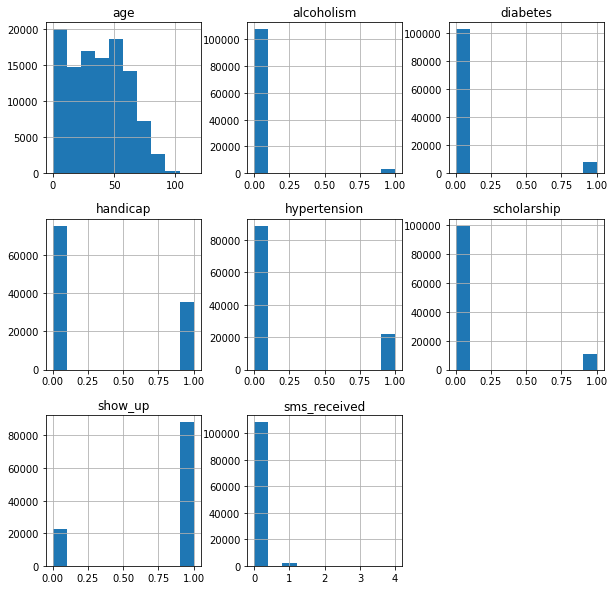

In [49]:
df.hist(figsize=(10,10))




###  Question 1: Is the show_up rate affected by the scholarship given?
        
      

In [50]:
# checking the values of people who receive the scholarship and who does not

df.scholarship.value_counts()

False    99660
True     10861
Name: scholarship, dtype: int64

Majority of the patient are not enjoying the Bolsia familia scholarship, I will then go ahead to see their rate when compared with the show up column.

In [51]:
# checking the appointment show up value for each category(receive or does not receive scholarship)

df.groupby('scholarship').show_up.value_counts()

scholarship  show_up
False        True       79924
             False      19736
True         True        8283
             False       2578
Name: show_up, dtype: int64

In [52]:
# calculating the rate of show up depending on the scholarship factor

df.groupby('scholarship')['show_up'].mean()

scholarship
False    0.801967
True     0.762637
Name: show_up, dtype: float64

There is no significant difference between the show up rate of people who received the scholarship and who does not. This will be proven more with a bar chart

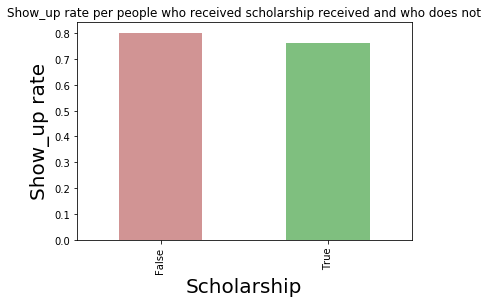

In [53]:
# Drawing a bar chart to show the Show up rate per people who received scholarship and who does not

df.groupby('scholarship')['show_up'].mean().plot(kind='bar', alpha= 0.5, color=['brown', 'green']);

# title and labels

plt.ylabel('Show_up rate', fontsize=20)
plt.xlabel('Scholarship', fontsize=20)
plt.title('Show_up rate per people who received scholarship received and who does not');




It can be clearly seen that there is no significant difference between this two categories, therefore, people showing up for their appointment can not be predicted with whether or not they are enjoing the Bolsia Familia scholarship


###  Question 2: Is the show_up rate affected by the number of sms received by the patient?

In [54]:
#checking the show up values base on each sms_received

df.groupby('sms_received').show_up.value_counts()

sms_received  show_up
0             True       86373
              False      21909
1             True        1676
              False        364
2             True         146
              False         37
3             True          10
              False          3
4             True           2
              False          1
Name: show_up, dtype: int64

In [55]:
#calculating the show_up proportion for the number of sms_received by patients

proportion = df.groupby(['sms_received']).apply(lambda df: pd.Series({'show up': df.show_up.sum(), 'No show up': (~df.show_up).sum()}))
proportion['proportion_show_up'] = proportion['show up'] / (proportion['No show up'] + proportion['show up'])

print(proportion)

              show up  No show up  proportion_show_up
sms_received                                         
0               86373       21909            0.797667
1                1676         364            0.821569
2                 146          37            0.797814
3                  10           3            0.769231
4                   2           1            0.666667


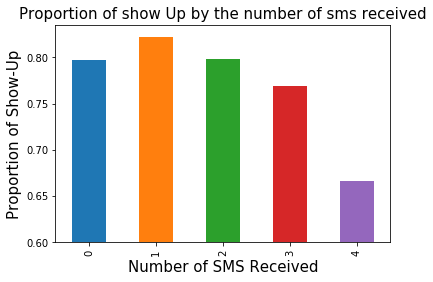

In [56]:
# plotting a bar chart to show the proportion of the show up calculated above

proportion['proportion_show_up'].plot(kind='bar', ylim=(0.6, 0.835));

# bar chart labels and title
plt.ylabel('Proportion of Show-Up', fontsize=15)
plt.xlabel('Number of SMS Received', fontsize = 15)
plt.title('Proportion of show Up by the number of sms received', fontsize=15);

Considering the above chart, we can presume that the higher the number of sms_received, the lower the show up. Also looking at the show up values and no show up values in the cell above we can see that few people receives the sms 3 times(13 people) and 4 times(3 people) so to futher analyze this factor, I will focus more on people who do not receive sms at all (sms_received = 0), people who receive 1 sms(sms_received = 1) and people who receives 2 sms(sms_received = 2) by ploting another bar chart still using the proportions calculated above.

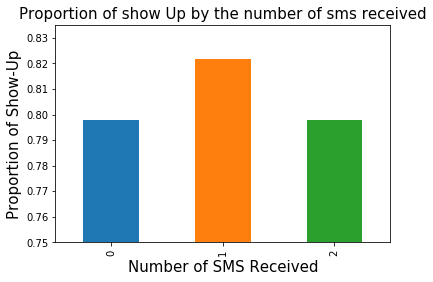

In [57]:
# plotting a bar chart to show the show_up rate by the number of sms received focusing on 0,1,2 sms_reveived value

new_proportion = proportion.loc[0:2, 'proportion_show_up']

new_proportion.plot( kind = 'bar', ylim=(0.75, 0.835));

plt.ylabel('Proportion of Show-Up', fontsize=15)
plt.xlabel('Number of SMS Received', fontsize = 15)
plt.title('Proportion of show Up by the number of sms received', fontsize=15);

It can be seen evidently that sending an sms to patient can increase the probabilty of the patient showing up for the appointment but not applicable again when more than one(1) sms is sent.

>*Note:* This analysis shows that the first sms sent to a patient serves as a reminder for the patients and help them to plan to show up for the appointment and this is enough as a reminder. Considering the chart, we can see that the 2nd, 3rd and 4th sms is no longer necessary and patient who do not want to show up will still not show up no matter the number of sms sent to them. Also, the 2nd sms might serve as a reminder for people whom the first sms is not delivered to due to one reason or the other such as network issue. 

### Question 3:Is the show_up rate affected by gap between the scheduledDay and appointmentDay?
        


I will be considering the difference between the appointment_day and the scheduled_day to see if it affect the show up rate of the patients

#### Creating a new column namely days_gap. This is the day difference between the appointment and schedule day

In [58]:
df['days_gap'] = (df['appointment_day'].dt.date - df['scheduled_day'].dt.date).dt.days

In [59]:
df['days_gap'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_gap, dtype: float64

Now, we can classify this column into four categories namely: no_gap(for both min and 25% since they are both 0%), short_gap(50%: 0 - 4days), medium_gap(75%: 5 - 15days), large_gap( max: 16 -179 days). I classify the column to see if a large gap in the appointment_day and scheduled_gap affects the show_up rate of the patients.

In [60]:
# classifying the days gap into their different categories making use of the describe() function
bins = df.days_gap.describe()[['min', '25%', '50%', '75%', 'max']].values

# setting to small number for the cut to work

bins[1] = 0.1
df['days_gap_categories'] = pd.cut(df.days_gap, bins=bins, 
                                   labels=['no_gap', 'short_gap', 'medium_gap', 'large_gap'], right=False)


In [61]:
days_gap_categories_rate=df.groupby('days_gap_categories').show_up.value_counts(normalize = True)
print(days_gap_categories_rate)

days_gap_categories  show_up
no_gap               True       0.953529
                     False      0.046471
short_gap            True       0.771107
                     False      0.228893
medium_gap           True       0.726528
                     False      0.273472
large_gap            True       0.672519
                     False      0.327481
Name: show_up, dtype: float64


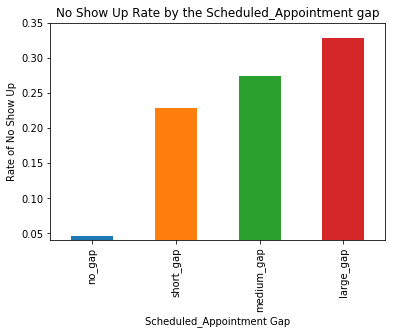

In [62]:
days_gap_categories_rate.loc[:, False].plot(kind='bar', title='No Show Up Rate by the Scheduled_Appointment gap')

plt.ylim(0.04, 0.35);
plt.ylabel('Rate of No Show Up');
plt.xlabel('Scheduled_Appointment Gap');

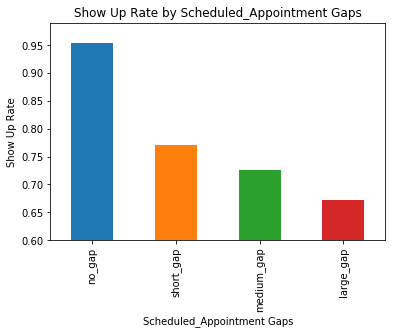

In [63]:
days_gap_categories_rate.loc[:, True].plot(kind='bar', title='Show Up Rate by Scheduled_Appointment Gaps')

plt.ylim(0.60, 0.99);
plt.ylabel('Show Up Rate');
plt.xlabel('Scheduled_Appointment Gaps');

It can be seen evidently from the two charts that the difference between the appointment_day and scheduled_day afftects the show up rate of the patients greatly. The higher the difference, the higher the probability that the patient will not show up. Therefore, the appointment day of patients shuld not be far from their scheduled day to increase the show up rate of the patient.

###  Question 4: Is the show_up rate affected by weekdays?

Firstly, I will create a weekday column from the appointment_day to know the day the appointmet falls to

In [65]:
# creating the weekday column

df['weekday'] = df['appointment_day'].dt.strftime('%A')

# showing the first five rows of the column(appointment_day and weekday)
df[['appointment_day', 'weekday']].head()

,appointment_day,weekday
0,2016-04-29,Friday
1,2016-04-29,Friday
2,2016-04-29,Friday
3,2016-04-29,Friday
4,2016-04-29,Friday


Now I will show the rate of show up by the weekdays and the rate of No show up by the weekdays

In [66]:
#calculating the rate of show up by weekdays

df.groupby('weekday')['show_up'].mean()

weekday
Friday       0.787739
Monday       0.793554
Saturday     0.769231
Thursday     0.806506
Tuesday      0.799126
Wednesday    0.803139
Name: show_up, dtype: float64

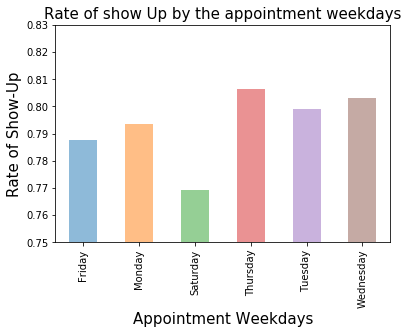

In [67]:
# show the proportion using a bar chart

df.groupby('weekday')['show_up'].mean().plot( kind = 'bar', alpha = 0.5, ylim=(0.75,0.83))

# bar chart labels and title
plt.ylabel('Rate of Show-Up', fontsize=15)
plt.xlabel('Appointment Weekdays', fontsize = 15)
plt.title('Rate of show Up by the appointment weekdays', fontsize=15);

In [68]:
show_up_appointment_weekday_rate=df.groupby('weekday').show_up.value_counts(normalize = True)
print(show_up_appointment_weekday_rate)

weekday    show_up
Friday     True       0.787739
           False      0.212261
Monday     True       0.793554
           False      0.206446
Saturday   True       0.769231
           False      0.230769
Thursday   True       0.806506
           False      0.193494
Tuesday    True       0.799126
           False      0.200874
Wednesday  True       0.803139
           False      0.196861
Name: show_up, dtype: float64


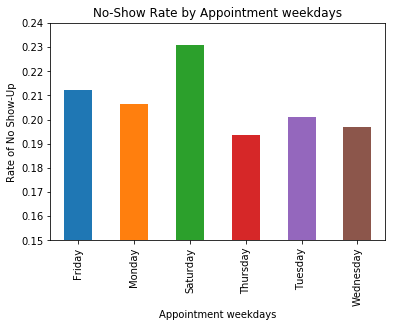

In [69]:
show_up_appointment_weekday_rate.loc[:, False].plot(kind='bar', title='No-Show Rate by Appointment weekdays')

plt.ylim(0.15, 0.24);
plt.ylabel('Rate of No Show-Up', fontsize = 15);
plt.xlabel('Appointment weekdays', fontsize = 15);


Considering the two charts above, Rate of show up by the appointment weekdays and the No show up rate by appointment weekdays, we can see that alot of patients tends to show up more on Thursday, Wednesday, Tuesday and monday compare to other days probably because they are weekdays and people plan their appointment with their normal job routine and decide to show up when chanced. Also, we can see that a lot of patients did not show up on Saturday and Fridays probably because it's weekend and there are different activities plan for the days hindering them from considering or forgetting their appointment day.

>*NOTE:* From the two bar charts, there is no record of SUNDAY'S in the weekdays because there is no appointment for patient on sundays. Not operating or booking appointments for patienton sunday's may be part of the hospital rules and regulation.

### Question 5: Is the show_up rate affected by the age of the patient?

In [70]:
# checking the age column

df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

I will classify the age of the patients into five categories using the describe() function. They are infants(min: 0), young(25%: 1 -18), youth(50%: 19 - 37), adults(75%: 38 - 55), and old(max: 56 - 115). This classification is done so as to check if the age of a patient is dependent on their show up.

In [74]:
# classifying the age into their different categories 
bin_edges = [0, 2, 18, 39, 59, 115 ]

df['age_categories'] = pd.cut(df['age'], bin_edges, labels=['infants', 'young', 'youth', 'adults', 'old' ])


In [75]:
age_categories_rate=df.groupby('age_categories').show_up.value_counts(normalize = True)
print(age_categories_rate)

age_categories  show_up
infants         True       0.828579
                False      0.171421
young           True       0.764871
                False      0.235129
youth           True       0.767493
                False      0.232507
adults          True       0.811918
                False      0.188082
old             True       0.846920
                False      0.153080
Name: show_up, dtype: float64


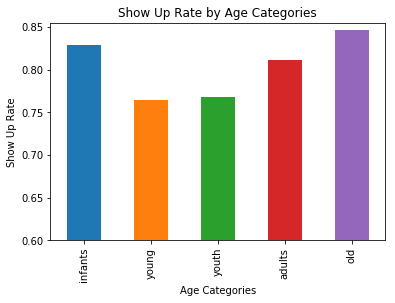

In [79]:
age_categories_rate.loc[:, True].plot(kind='bar', title='Show Up Rate by Age Categories')

plt.ylim(0.60, 0.855);
plt.ylabel('Show Up Rate');
plt.xlabel('Age Categories');

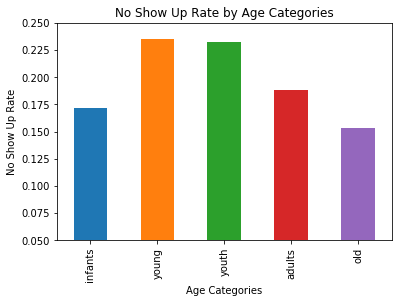

In [82]:
age_categories_rate.loc[:, False].plot(kind='bar', title='No Show Up Rate by Age Categories')

plt.ylim(0.05, 0.25);
plt.ylabel('No Show Up Rate', fontsize = 10);
plt.xlabel('Age Categories', fontsize = 10);

From the Show up rate by age categories and the No show up rate by age categories charts, it can be deduced that infants and old patients show up more for their appointment compare to the other groups probably because they have people who are taking care of them and responsible for their wellbeing. The young and youth categories have a higher no show up rate probably because they have many activities going on in them and does not take the appointment serious or they are over taken by other things thereby not showing up for their appointment.

## CONCLUSION

All my findings from the analysis are summarized below

The patients no show up rate is not affected by whether the patient is enjoyong the Bolsa familia scholarship or not.

Sending sms to patients can serve as a reminder to patient and reduce no show up rate, but this is only effective if it is 1 SMS, if more than 1, the effect decreases.

Against the gap between the scheduled day and the appointment day, there is a high probability that patients will show up if there is no gap or little gap between their scheduled day and appointment day.

Considering the appointment weekdays, the patient tends to show up more during the week compare to weekends(friday's and saturday's).

The No show up rate by the age categories shows that young(3-18) and youth(age 19 - 39) do not show up well for their appointment while infants(age 0) and old people (60-115) shows up for their appointment

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])